In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

# 学習用データ。xが入力、yが出力(答え)です。
 
x = np.array([[10,20,30], [20,30,40], [30, 40, 50], [40, 50, 60]])
y = np.array([[40, 50], [50, 60], [60, 70], [70, 80]])

# 行列のフォーマット変更。
# LSTMは、入力フォーマットを[サンプルの数, 入力のステップ数(この場合は3), features]とする必要があるためです。
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))

m = Sequential()
m.add(LSTM(50, activation='relu', input_shape=(3, 1)))
m.add(RepeatVector(2))
m.add(LSTM(50, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')

m.summary()
# 学習。時間が少しかかる可能性があります。
m.fit(x, y, epochs=1000, verbose=0)

x_input = np.array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = m.predict(x_input)
print(yhat)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 2, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 2, 50)             20200     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 2, 1)              51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
[[[81.13086 ]
  [91.260284]]]


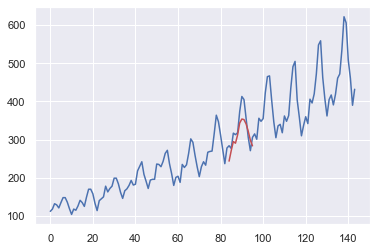

In [23]:
df = pd.read_csv('AirPassengers.csv')
ts = df['#Passengers']

x = [] # train
y = [] # test (answer)
for i in range(0, 72):
    tmpX = []
    for j in range(0, 24):
        tmpX.append(ts[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 12):
        tmpY.append(ts[24+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
# 入力データ数が24なので、input_shapeの値が(24,1)です。
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(24, 1)))
# 予測範囲は12ステップなので、RepeatVectoorに12を指定する必要があります。
m.add(RepeatVector(12)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

input = np.array(ts[60:84]) 
input = input.reshape((1,24,1))
yhat = m.predict(input)
 
# 可視化用に、予測結果yhatを、配列predictに格納
predict = []
for i in range(0, 12):
    predict.append(yhat[0][i])
 
# 比較するために実データをプロット
plt.plot(ts)
 
# 予測したデータをプロット
xdata = np.arange(84, 96, 1)
plt.plot(xdata, predict, 'r')

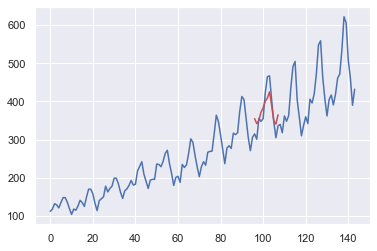

In [5]:
input = np.array(ts[72:96])
input = input.reshape((1,24,1))
yhat = m.predict(input)
 
predict = []
for i in range(0, 12):
    predict.append(yhat[0][i])
 
plt.plot(ts)
xdata = np.arange(96, 108, 1)
plt.plot(xdata, predict, 'r')

In [18]:
import sys

xdata = []  # 実数を入れるリスト

with open('xtrain.txt', 'r', encoding='utf-8') as fin:  # ファイルを開く
    for line in fin.readlines():  # 行を読み込んでfor文で回す
        try:
            num = float(line)  # 行を実数（float）に変換する
        except ValueError as e:
            print(e, file=sys.stderr)  # エラーが出たら画面に出力
            continue

        xdata.append(num)  # 変換した実数をリストに保存する

print(xdata)  # リストの中身を出力import sys



[1.1274107, 7.5472852, -2.7114295, 4.0645552, 0.62042501, -1.2266164, -2.9086753, 0.43580964, 1.8249082, 0.79726179, 1.6163116, 1.5705799, -0.43835231, 3.9632491, -1.6348437, -6.7126994, -4.890733, 5.7310007, -1.3588078, -3.0355172, -2.6517871, -2.3600699, -1.5270717, -1.5542357, -0.67618477, 4.7149251, 0.23263927, 4.0447145, 2.4347364, 1.06179, -1.8541007, -1.453661, -0.74332987, -3.9837932, 6.7867693, 3.1253625, -2.143371, -3.0907641, -0.47929651, 2.3854039, -0.85271817, -4.0715031, -2.8863443, -0.088762892, 3.6765095, -0.15648615, 2.9163893, -1.6522303, -0.083693803, 0.44034603, -5.1834305, -7.1817578, 1.2638641, -0.48465406, 3.6898493, -0.20355625, -1.2546058, -1.6916564, 2.0611746, 1.5862193, 2.7193064, 6.1906694, 1.9284138, -5.4122613, 0.42281956, 4.7439956, -3.1517099, -0.076706157, -4.7382447, 1.1870903, -1.5239819, -4.9228307, 1.7707391, 6.7341381, 2.0370211, -0.55376703, 9.7773917, -2.1158167, 3.5191258, 2.4213617, 2.3946626, 0.24782296, -4.2870818, 2.1378312, 0.72761744, -4.

In [20]:
ydata = []  # 実数を入れるリスト

with open('ytrain.txt','r', encoding='utf-8') as fin:  # ファイルを開く
    for line in fin.readlines():  # 行を読み込んでfor文で回す
        try:
            num = float(line)  # 行を実数（float）に変換す
        except ValueError as e:
            print(e, file=sys.stderr)  # エラーが出たら画面に出力
            continue

        ydata.append(num)

print(ydata)


[1.1274107, 7.5472852, -2.7114295, 4.0645552, 0.62042501, -1.2266164, -2.9086753, 0.43580964, 1.8249082, 0.79726179, 1.6163116, 1.5705799, -0.43835231, 3.9632491, -1.6348437, -6.7126994, -4.890733, 5.7310007, -1.3588078, -3.0355172, -2.6517871, -2.3600699, -1.5270717, -1.5542357, -0.67618477, 4.7149251, 0.23263927, 4.0447145, 2.4347364, 1.06179, -1.8541007, -1.453661, -0.74332987, -3.9837932, 6.7867693, 3.1253625, -2.143371, -3.0907641, -0.47929651, 2.3854039, -0.85271817, -4.0715031, -2.8863443, -0.088762892, 3.6765095, -0.15648615, 2.9163893, -1.6522303, -0.083693803, 0.44034603, -5.1834305, -7.1817578, 1.2638641, -0.48465406, 3.6898493, -0.20355625, -1.2546058, -1.6916564, 2.0611746, 1.5862193, 2.7193064, 6.1906694, 1.9284138, -5.4122613, 0.42281956, 4.7439956, -3.1517099, -0.076706157, -4.7382447, 1.1870903, -1.5239819, -4.9228307, 1.7707391, 6.7341381, 2.0370211, -0.55376703, 9.7773917, -2.1158167, 3.5191258, 2.4213617, 2.3946626, 0.24782296, -4.2870818, 2.1378312, 0.72761744, -4.

In [22]:
datax.dtypes

AttributeError: 'str' object has no attribute 'dtypes'

In [3]:

x = [] # train
y = [] # test (answer)
for i in range(0, 460):
    tmpX = []
    for j in range(0, 20):
        tmpX.append(datax[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 3):
        tmpY.append(datay[20+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(20, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=100, verbose=1)

input = np.array(ts[60:80]) 
input = input.reshape((1,3,1))
yhat = m.predict(input)
 
# 可視化用に、予測結果yhatを、配列predictに格納
predict = []
for i in range(0, 3):
    predict.append(yhat[0][i])
 
# 比較するために実データをプロット
plt.plot(datay)
 
# 予測したデータをプロット
xdata = np.arange(80, 83, 1)
plt.plot(xdata, predict, 'r')

NameError: name 'datax' is not defined

In [5]:
xdf = pd.read_csv('xdata.csv', dtype={1: 'float'})

In [6]:
ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})

In [7]:
print(xdf)

     #data
0    1.130
1    7.550
2   -2.710
3    4.060
4    0.620
..     ...
496 -3.050
497 -0.303
498 -2.180
499 -0.876
500  3.950

[501 rows x 1 columns]


In [11]:
xts = xdf['#data']
yts = ydf['#data']

In [12]:
print(xts)

0      1.130
1      7.550
2     -2.710
3      4.060
4      0.620
       ...  
496   -3.050
497   -0.303
498   -2.180
499   -0.876
500    3.950
Name: #data, Length: 501, dtype: float64


In [22]:
x = [] # train
y = [] # test (answer)
for i in range(0, 460):
    tmpX = []
    for j in range(0, 20):
        tmpX.append(xts[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 3):
        tmpY.append(yts[20+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(20, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.add(LSTM(100,activation='relu', ))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

input = np.array(xts[60:80]) 
input = input.reshape((1,20,1))
yhat = m.predict(input)
 
# 可視化用に、予測結果yhatを、配列predictに格納
predict = []
for i in range(0, 3):
    predict.append(yhat[0][i])
 
# 比較するために実データをプロット
plt.plot(yts)
 
# 予測したデータをプロット
xdata = np.arange(80, 83, 1)
plt.plot(xdata, predict, 'r')

ValueError: in user code:

    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\losses.py:1204 mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\gen_math_ops.py:10513 squared_difference
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\ops.py:3561 _create_op_internal
        ret = Operation(
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 100 and 3 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_5/lstm_15/strided_slice_3, mean_squared_error/remove_squeezable_dimensions/Squeeze)' with input shapes: [?,100], [?,3].


In [20]:
for i in range(0, 20):
    input = np.array(xts[i:i+20]) 
    input = input.reshape((1,20,1))
    yhat = m.predict(input)
    print(yhat,yts[i+20:i+23])

[[1.9887886e-03 1.6520182e-06 0.0000000e+00 2.0334765e-03 0.0000000e+00
  1.4284756e-03 0.0000000e+00 2.5128843e-03 0.0000000e+00 0.0000000e+00
  2.1590067e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.5806188e-03
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.5660327e-04
  0.0000000e+00 1.4680799e-03 1.4262855e-03 0.0000000e+00 8.8651504e-06
  0.0000000e+00 1.9522710e-03 0.0000000e+00 0.0000000e+00 9.0327486e-04
  0.0000000e+00 0.0000000e+00 3.5517730e-04 0.0000000e+00 2.8578520e-03
  2.1858176e-03 2.0764170e-03 1.0111303e-03 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 7.4482692e-04 2.6164372e-03 2.1027117e-03
  0.0000000e+00 7.1925455e-04 1.9629344e-03 1.2372275e-03 0.0000000e+00
  1.4968072e-03 0.0000000e+00 0.0000000e+00 1.6086699e-03 0.0000000e+00
  0.0000000e+00 1.8596738e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 2.0400188e-03 0.0000000e+00 2.2591306e-03 0.0000

[[1.3441698e-03 1.1180033e-06 0.0000000e+00 1.3760444e-03 0.0000000e+00
  9.6711598e-04 0.0000000e+00 1.7018160e-03 0.0000000e+00 0.0000000e+00
  1.4599715e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0683709e-03
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.0913067e-04
  0.0000000e+00 9.9283538e-04 9.6559996e-04 0.0000000e+00 6.0647517e-06
  0.0000000e+00 1.3217004e-03 0.0000000e+00 0.0000000e+00 6.1057025e-04
  0.0000000e+00 0.0000000e+00 2.3983684e-04 0.0000000e+00 1.9327113e-03
  1.4789959e-03 1.4039297e-03 6.8351289e-04 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 5.0419744e-04 1.7709399e-03 1.4226289e-03
  0.0000000e+00 4.8618822e-04 1.3268746e-03 8.3807315e-04 0.0000000e+00
  1.0126053e-03 0.0000000e+00 0.0000000e+00 1.0879550e-03 0.0000000e+00
  0.0000000e+00 1.2579574e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.3798047e-03 0.0000000e+00 1.5288916e-03 0.0000

[[1.8475770e-03 1.5466513e-06 0.0000000e+00 1.8888295e-03 0.0000000e+00
  1.3283789e-03 0.0000000e+00 2.3363417e-03 0.0000000e+00 0.0000000e+00
  2.0066784e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4685520e-03
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.2438594e-04
  0.0000000e+00 1.3642143e-03 1.3262865e-03 0.0000000e+00 8.4509938e-06
  0.0000000e+00 1.8150291e-03 0.0000000e+00 0.0000000e+00 8.3912862e-04
  0.0000000e+00 0.0000000e+00 3.2966607e-04 0.0000000e+00 2.6571329e-03
  2.0322120e-03 1.9294579e-03 9.3885692e-04 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 6.9237215e-04 2.4325869e-03 1.9533397e-03
  0.0000000e+00 6.6855468e-04 1.8237507e-03 1.1499673e-03 0.0000000e+00
  1.3912027e-03 0.0000000e+00 0.0000000e+00 1.4952896e-03 0.0000000e+00
  0.0000000e+00 1.7278701e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.8956803e-03 0.0000000e+00 2.0995154e-03 0.0000

In [42]:
for i in range(0, 20):
    print(yts[20+i:23+i])

20   -2.65
21   -2.36
22   -1.53
Name: #data, dtype: float64
21   -2.36
22   -1.53
23   -1.55
Name: #data, dtype: float64
22   -1.530
23   -1.550
24   -0.676
Name: #data, dtype: float64
23   -1.550
24   -0.676
25    4.710
Name: #data, dtype: float64
24   -0.676
25    4.710
26    0.233
Name: #data, dtype: float64
25    4.710
26    0.233
27    4.040
Name: #data, dtype: float64
26    0.233
27    4.040
28    2.430
Name: #data, dtype: float64
27    4.04
28    2.43
29    1.06
Name: #data, dtype: float64
28    2.43
29    1.06
30   -1.85
Name: #data, dtype: float64
29    1.06
30   -1.85
31   -1.45
Name: #data, dtype: float64
30   -1.850
31   -1.450
32   -0.743
Name: #data, dtype: float64
31   -1.450
32   -0.743
33   -3.980
Name: #data, dtype: float64
32   -0.743
33   -3.980
34    6.790
Name: #data, dtype: float64
33   -3.98
34    6.79
35    3.13
Name: #data, dtype: float64
34    6.79
35    3.13
36   -2.14
Name: #data, dtype: float64
35    3.13
36   -2.14
37   -3.09
Name: #data, dtype: float64


In [10]:
x = [] # train
y = [] # test (answer)
for i in range(0, 460):
    tmpX = []
    for j in range(0, 20):
        tmpX.append(xts[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 3):
        tmpY.append(yts[20+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(20, 1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', input_shape=(20, 1)))
m.add(RepeatVector(3))
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.add(LSTM(100,activation='relu', ))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=1)

input = np.array(xts[60:80]) 
input = input.reshape((1,20,1))
yhat = m.predict(input)
 
# 可視化用に、予測結果yhatを、配列predictに格納
predict = []
for i in range(0, 3):
    predict.append(yhat[0][i])
 
# 比較するために実データをプロット
plt.plot(yts)
 
# 予測したデータをプロット
xdata = np.arange(80, 83, 1)
plt.plot(xdata, predict, 'r')

Epoch 1/1000


ValueError: in user code:

    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\keras\losses.py:1204 mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\gen_math_ops.py:10513 squared_difference
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\ops.py:3561 _create_op_internal
        ret = Operation(
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\yukin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 100 and 3 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_3/lstm_13/strided_slice_3, mean_squared_error/remove_squeezable_dimensions/Squeeze)' with input shapes: [?,100], [?,3].


In [24]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

xdf = pd.read_csv('xdata.csv', dtype={1: 'float'})
ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})

xts = xdf['#data']
yts = ydf['#data']

ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})
x = [] # train
y = [] # test (answer)
for i in range(0, 460):
    tmpX = []
    for j in range(0, 20):
        tmpX.append(xts[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 3):
        tmpY.append(yts[20+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(20, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='SGD', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

 


In [25]:
for i in range(0, 20):
    input = np.array(xts[i:i+20]) 
    input = input.reshape((1,20,1))
    yhat = m.predict(input)
    print(yhat)

[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]
[[[nan]
  [nan]
  [nan]]]


In [26]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

xdf = pd.read_csv('xdata.csv', dtype={1: 'float'})
ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})

xts = xdf['#data']
yts = ydf['#data']

ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})
x = [] # train
y = [] # test (answer)
for i in range(0, 460):
    tmpX = []
    for j in range(0, 20):
        tmpX.append(xts[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 3):
        tmpY.append(yts[20+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='selu', input_shape=(20, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='selu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='momentumSGD', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

 


ValueError: Unknown optimizer: momentumSGD. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [27]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

xdf = pd.read_csv('xdata.csv', dtype={1: 'float'})
ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})

xts = xdf['#data']
yts = ydf['#data']

ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})
x = [] # train
y = [] # test (answer)
for i in range(0, 460):
    tmpX = []
    for j in range(0, 20):
        tmpX.append(xts[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 3):
        tmpY.append(yts[20+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='selu', input_shape=(20, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='selu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='NAG', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

 


ValueError: Unknown optimizer: NAG. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [29]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

xdf = pd.read_csv('xdata.csv', dtype={1: 'float'})
ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})

xts = xdf['#data']
yts = ydf['#data']

ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})
x = [] # train
y = [] # test (answer)
for i in range(0, 460):
    tmpX = []
    for j in range(0, 20):
        tmpX.append(xts[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 3):
        tmpY.append(yts[20+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(20, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='AdaGrad', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

 


In [30]:
for i in range(0, 20):
    input = np.array(xts[i:i+20]) 
    input = input.reshape((1,20,1))
    yhat = m.predict(input)
    print(yhat)

[[[-0.06018993]
  [-0.07843168]
  [-0.08238645]]]
[[[-0.04961725]
  [-0.05892485]
  [-0.05567449]]]
[[[-0.0559967 ]
  [-0.07013784]
  [-0.07046661]]]
[[[-0.07316466]
  [-0.1021763 ]
  [-0.11520252]]]
[[[-0.08697247]
  [-0.1274182 ]
  [-0.14979734]]]
[[[-0.10480341]
  [-0.1605766 ]
  [-0.19503589]]]
[[[-0.23785411]
  [-0.39102182]
  [-0.49691287]]]
[[[-0.20265323]
  [-0.33011544]
  [-0.41741884]]]
[[[-0.26594892]
  [-0.4384689 ]
  [-0.5568422 ]]]
[[[-0.27261817]
  [-0.4486375 ]
  [-0.56919456]]]
[[[-0.2427117 ]
  [-0.39670944]
  [-0.5016649 ]]]
[[[-0.16563767]
  [-0.26481923]
  [-0.33045077]]]
[[[-0.12394208]
  [-0.19388172]
  [-0.23891133]]]
[[[-0.10171896]
  [-0.15671295]
  [-0.19212684]]]
[[[0.0014252 ]
  [0.02635107]
  [0.05247948]]]
[[[-0.23208086]
  [-0.3788341 ]
  [-0.47819272]]]
[[[-0.25462845]
  [-0.41347653]
  [-0.52003515]]]
[[[-0.16057771]
  [-0.25364366]
  [-0.31297472]]]
[[[-0.0903307 ]
  [-0.13341685]
  [-0.15729712]]]
[[[-0.09080533]
  [-0.13603313]
  [-0.16273221]]]


In [31]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

xdf = pd.read_csv('xdata.csv', dtype={1: 'float'})
ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})

xts = xdf['#data']
yts = ydf['#data']

ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})
x = [] # train
y = [] # test (answer)
for i in range(0, 460):
    tmpX = []
    for j in range(0, 20):
        tmpX.append(xts[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 3):
        tmpY.append(yts[20+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(20, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='RMSprop', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

 


In [32]:
for i in range(0, 20):
    input = np.array(xts[i:i+20]) 
    input = input.reshape((1,20,1))
    yhat = m.predict(input)
    print(yhat)

[[[-2.6506574]
  [-2.366722 ]
  [-1.5632777]]]
[[[-2.401995 ]
  [-1.5574827]
  [-1.5888978]]]
[[[-1.5535657]
  [-1.6261048]
  [-0.8560891]]]
[[[-1.6903031]
  [-0.7163734]
  [ 4.50332  ]]]
[[[-1.1067361 ]
  [ 4.695243  ]
  [ 0.05244698]]]
[[[4.3443356 ]
  [0.14535403]
  [3.8684814 ]]]
[[[0.02551837]
  [4.064953  ]
  [2.3289435 ]]]
[[[3.401441  ]
  [2.2054336 ]
  [0.77370256]]]
[[[ 2.1325314]
  [ 0.8151244]
  [-2.1338458]]]
[[[ 1.1610881]
  [-2.029746 ]
  [-1.4000288]]]
[[[-1.8035427]
  [-1.6648761]
  [-0.8791854]]]
[[[-1.4363455]
  [-0.8668098]
  [-3.7786927]]]
[[[-0.98654336]
  [-3.4866953 ]
  [ 6.2376223 ]]]
[[[-4.1067104]
  [ 6.7510853]
  [ 2.8911686]]]
[[[ 6.509242 ]
  [ 2.92263  ]
  [-2.4364328]]]
[[[ 3.032506 ]
  [-2.521256 ]
  [-3.1758068]]]
[[[-2.3431892 ]
  [-3.1055756 ]
  [-0.31853896]]]
[[[-3.414571  ]
  [-0.10463621]
  [ 2.3083644 ]]]
[[[-0.40888038]
  [ 2.3962455 ]
  [-0.8471865 ]]]
[[[ 2.4917324]
  [-1.0984863]
  [-3.8901658]]]


In [33]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

xdf = pd.read_csv('xdata.csv', dtype={1: 'float'})
ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})

xts = xdf['#data']
yts = ydf['#data']

ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})
x = [] # train
y = [] # test (answer)
for i in range(0, 460):
    tmpX = []
    for j in range(0, 20):
        tmpX.append(xts[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 3):
        tmpY.append(yts[20+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(20, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='AdaDelta', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

 


In [34]:
for i in range(0, 20):
    input = np.array(xts[i:i+20]) 
    input = input.reshape((1,20,1))
    yhat = m.predict(input)
    print(yhat)

[[[-0.07127478]
  [-0.12129468]
  [-0.15850095]]]
[[[-0.05970119]
  [-0.10071897]
  [-0.13095722]]]
[[[-0.05127518]
  [-0.08504049]
  [-0.10987473]]]
[[[-0.04361427]
  [-0.071844  ]
  [-0.09238932]]]
[[[-0.03835012]
  [-0.06276325]
  [-0.08061862]]]
[[[-0.03340007]
  [-0.0543123 ]
  [-0.06957762]]]
[[[-0.07359338]
  [-0.12392649]
  [-0.16061084]]]
[[[-0.06668717]
  [-0.11192273]
  [-0.14483027]]]
[[[-0.08825796]
  [-0.15002573]
  [-0.19488934]]]
[[[-0.09430467]
  [-0.16029203]
  [-0.20846371]]]
[[[-0.08693724]
  [-0.14769453]
  [-0.19207779]]]
[[[-0.07397288]
  [-0.12573543]
  [-0.16352046]]]
[[[-0.0597496 ]
  [-0.10027301]
  [-0.12987252]]]
[[[-0.04752671]
  [-0.07915822]
  [-0.10215709]]]
[[[-0.04234479]
  [-0.07024908]
  [-0.09088706]]]
[[[-0.09716375]
  [-0.16623656]
  [-0.21675701]]]
[[[-0.11164521]
  [-0.19071859]
  [-0.24824876]]]
[[[-0.09457678]
  [-0.16177598]
  [-0.21136451]]]
[[[-0.07737383]
  [-0.13183291]
  [-0.17225908]]]
[[[-0.06121126]
  [-0.10344162]
  [-0.13472143]]]


In [35]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

xdf = pd.read_csv('xdata.csv', dtype={1: 'float'})
ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})

xts = xdf['#data']
yts = ydf['#data']

ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})
x = [] # train
y = [] # test (answer)
for i in range(0, 460):
    tmpX = []
    for j in range(0, 20):
        tmpX.append(xts[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 3):
        tmpY.append(yts[20+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(20, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='nadam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

 


In [36]:
for i in range(0, 20):
    input = np.array(xts[i:i+20]) 
    input = input.reshape((1,20,1))
    yhat = m.predict(input)
    print(yhat)

[[[-2.7386813]
  [-2.1428454]
  [-1.4297842]]]
[[[-2.3112495]
  [-1.3683578]
  [-1.6430697]]]
[[[-1.5125468 ]
  [-1.4928403 ]
  [-0.56487995]]]
[[[-1.3642387]
  [-0.9314939]
  [ 4.902359 ]]]
[[[-0.66524684]
  [ 4.5475554 ]
  [ 0.3580622 ]]]
[[[4.7029567 ]
  [0.23518153]
  [4.198521  ]]]
[[[0.16102643]
  [4.0211277 ]
  [2.1593463 ]]]
[[[3.5448732]
  [2.4290261]
  [0.7040645]]]
[[[ 2.1818385]
  [ 0.9753762]
  [-1.9040146]]]
[[[ 0.7751299]
  [-1.6146005]
  [-1.6962918]]]
[[[-2.0457458 ]
  [-1.3786142 ]
  [-0.72993284]]]
[[[-1.6269734 ]
  [-0.70004743]
  [-3.868562  ]]]
[[[-0.90744776]
  [-4.025934  ]
  [ 6.5059824 ]]]
[[[-3.9836574]
  [ 6.5169554]
  [ 3.0613437]]]
[[[ 6.822729 ]
  [ 3.126902 ]
  [-2.0994618]]]
[[[ 3.3294077]
  [-2.1310296]
  [-3.0744839]]]
[[[-1.8129072 ]
  [-2.921362  ]
  [-0.34000495]]]
[[[-3.2588258 ]
  [-0.33252177]
  [ 2.2958448 ]]]
[[[-0.36137852]
  [ 2.43034   ]
  [-0.96605474]]]
[[[ 2.4762933]
  [-0.844622 ]
  [-4.1196527]]]


In [37]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

xdf = pd.read_csv('xdata.csv', dtype={1: 'float'})
ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})

xts = xdf['#data']
yts = ydf['#data']

ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})
x = [] # train
y = [] # test (answer)
for i in range(0, 460):
    tmpX = []
    for j in range(0, 20):
        tmpX.append(xts[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 3):
        tmpY.append(yts[20+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(20, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='Eve', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

 


ValueError: Unknown optimizer: Eve. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [38]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

xdf = pd.read_csv('xdata.csv', dtype={1: 'float'})
ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})

xts = xdf['#data']
yts = ydf['#data']

ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})
x = [] # train
y = [] # test (answer)
for i in range(0, 460):
    tmpX = []
    for j in range(0, 20):
        tmpX.append(xts[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 3):
        tmpY.append(yts[20+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(20, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='Santa', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

 


ValueError: Unknown optimizer: Santa. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [40]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

xdf = pd.read_csv('xdata.csv', dtype={1: 'float'})
ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})

xts = xdf['#data']
yts = ydf['#data']

ydf = pd.read_csv('ydata.csv', dtype={1: 'float'})
x = [] # train
y = [] # test (answer)
for i in range(0, 460):
    tmpX = []
    for j in range(0, 20):
        tmpX.append(xts[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 3):
        tmpY.append(yts[20+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(20, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='AMSGrad', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

 


ValueError: Unknown optimizer: AMSGrad. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.